In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
dataset = fetch_california_housing()

In [3]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

### Simple Linear Regressor : X_1 to Y

In [5]:
x = dataset['data'][..., 0:1]
y = dataset['target']

Text(0, 0.5, 'MedHouseVal')

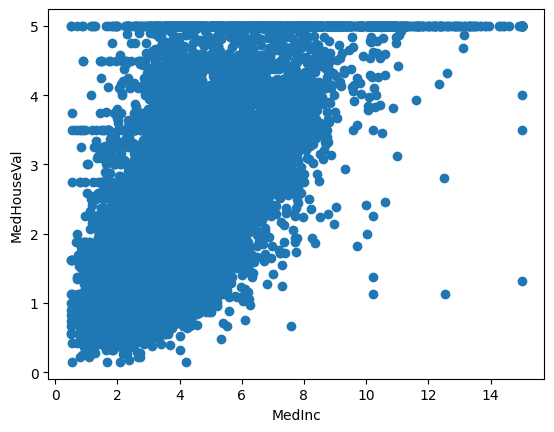

In [13]:
plt.scatter(x[..., 0], y)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

It can be seen that more is the median income, more is the median house value

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [8]:
print(x_train.shape, x_test.shape)

(16512, 1) (4128, 1)


In [9]:
model = LinearRegression()

In [10]:
model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'MedHouseVal')

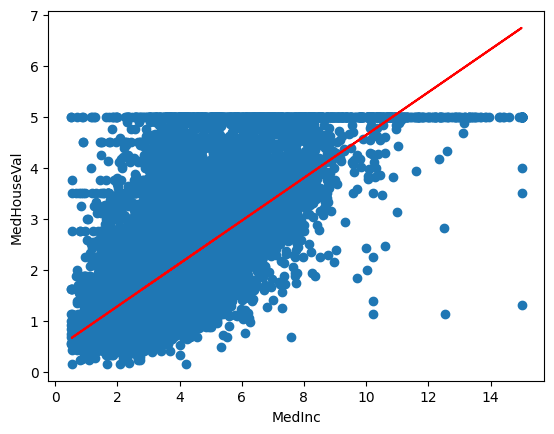

In [14]:
plt.scatter(x[..., 0], y)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')

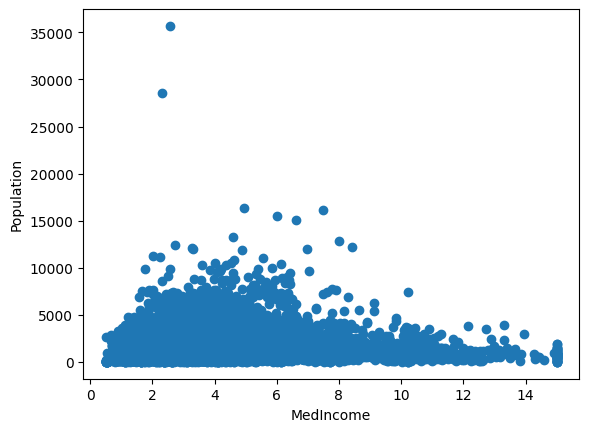

In [27]:
plt.scatter(x[..., 0], x[..., 4])
#plt.plot(x_test, y_pred, color='red')
plt.xlabel('MedIncome')
plt.ylabel('Population')
plt.show()

In [15]:
# y = wx + b

w = model.coef_
b = model.intercept_
print(w, b)

[0.419956] 0.43809227988747823


In [16]:
print(y_pred[0], w*x_test[0] + b)

2.619847684618605 [2.61984768]


In [17]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.451216230862692 0.7376898292223193


### Multi-linear Regression

In [18]:
x = dataset['data']
y = dataset['target']

In [19]:
print(x.shape)

(20640, 8)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [22]:
w = model.coef_
b = model.intercept_
print(w, b)

[ 4.35119606e-01  9.12686690e-03 -1.14162224e-01  6.30759571e-01
 -4.35689323e-06 -3.44731596e-03 -4.13338108e-01 -4.27711555e-01] -36.346799184357664


In [23]:
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6206092942402258 0.5194254432612038


### Assignment

On the test data, we can see r2 score has increased(which ideally should be 1. The more closer to 1, the better r2score's). Whereas accuracy should get increased in test data, which here is the case.

To get more insights, latitude and longitude can be combined and compared with income feature.

But still this is clearly not best model to predict the median price.